DAAA2B02 <br>
LIM HUR

# Medical Insurance price prediction

Source: https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction

In [1]:
!pip install tqdm

In [1]:
import pandas as pd
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from IPython.display import display
import warnings
from statsmodels.api import qqplot
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [2]:
# Regression models
from sklearn.svm import LinearSVR,SVR,NuSVR
# from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,BayesianRidge,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor


# Tools to help with data preprocessing
from sklearn.pipeline import make_pipeline,Pipeline,FeatureUnion,make_union
from sklearn.compose import ColumnTransformer,make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer, PolynomialFeatures, OneHotEncoder, PowerTransformer
from sklearn.decomposition import PCA


# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV


# Feature Selection
from sklearn.feature_selection import SelectKBest,SelectFromModel, RFECV, SelectKBest, mutual_info_regression, RFE

# model evaluation
from sklearn.model_selection import train_test_split, cross_validate, KFold, learning_curve,validation_curve
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error,SCORERS,make_scorer

# Feature importance for interpretability
from sklearn.inspection import permutation_importance

#Base
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.base import clone
from xgboost import XGBRFRegressor, XGBRegressor
random_state = np.random.RandomState(42)
# Setting random state for robustness of cross-validation results
import xgboost

# Reading from csv file

In [3]:
med_df = pd.read_csv('Medicalpremium.csv')
med_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


## Exploratory data analysis
- EDA will be carried out to discover characteristics of the data
- Develop a better understanding of data before we build the model



In [5]:
med_EDA = med_df.copy()

In [6]:
display(med_EDA.describe(include='all'))
# Drop product id as it represents more of a counter
display(med_EDA.info())

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


None

In [7]:
med_EDA.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

# No missing values

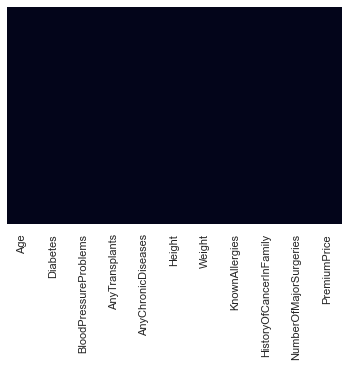

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [8]:
sns.heatmap(med_EDA.isnull(),yticklabels=False,cbar=False)
plt.show()
# No missing values.
med_EDA.isnull().sum()

# Target variable analysis

IQR: 7000.0


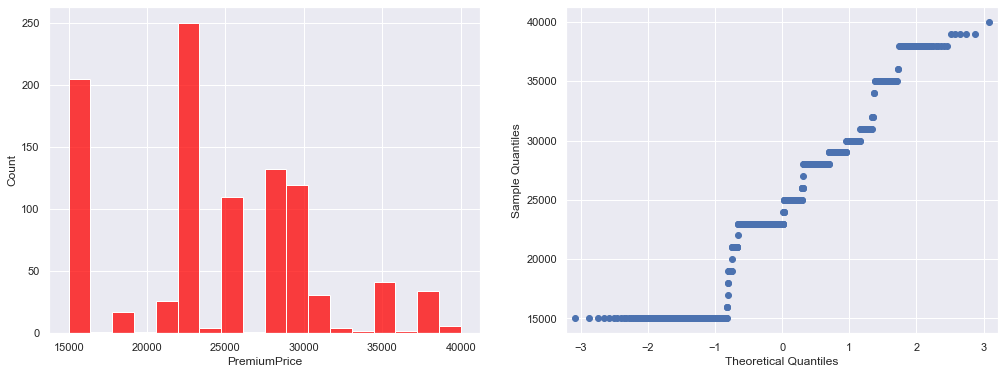

In [9]:
figdist, (axhist, axqq) = plt.subplots(1,2, figsize=(17,6))
# sns.set_context('notebook')
sns.histplot(data=med_EDA,x='PremiumPrice',color='red',ax=axhist)
qqplot(med_EDA['PremiumPrice'],ax=axqq)
figdist.show()
print('IQR:',np.quantile(med_EDA['PremiumPrice'], .75) -np.quantile(med_EDA['PremiumPrice'],.25)  )

- Not too many outliers
- Not normally distributed

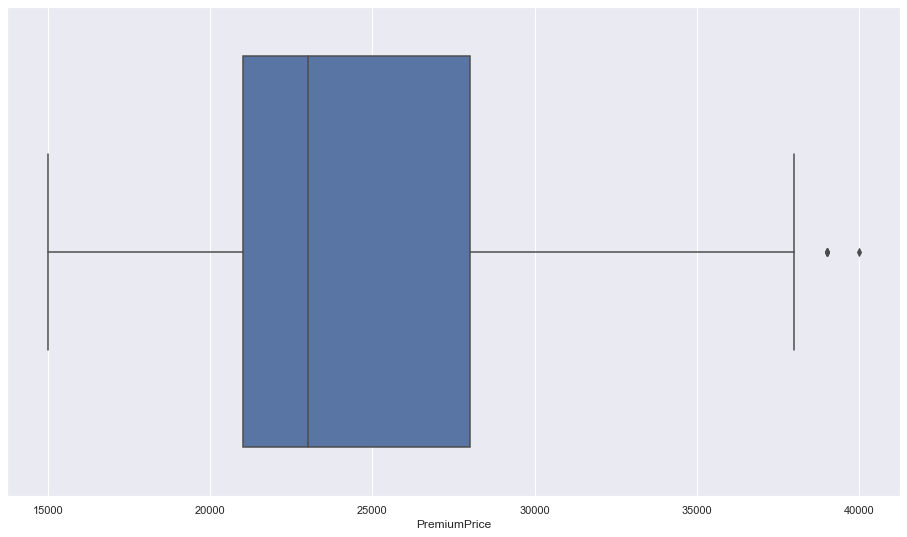

In [10]:
plt.figure(figsize = (16,9))
sns.boxplot( x = 'PremiumPrice' , data = med_EDA )
plt.show()

In [11]:
binary_cols = ['HistoryOfCancerInFamily', 'KnownAllergies', 'AnyChronicDiseases', 'AnyTransplants', 'BloodPressureProblems', 'Diabetes']
numerical_cols = [ 'Weight', 'Height', 'Age' ]

# Outlier investigation

- We can see outliers present at around 38000 and onwards.
- Lets investigate those values

- We can see that from below, most of the 'outliers' have transplants, which can explain why their insurance are more expensive. hence, the outliers are valid and we do not need to drop them

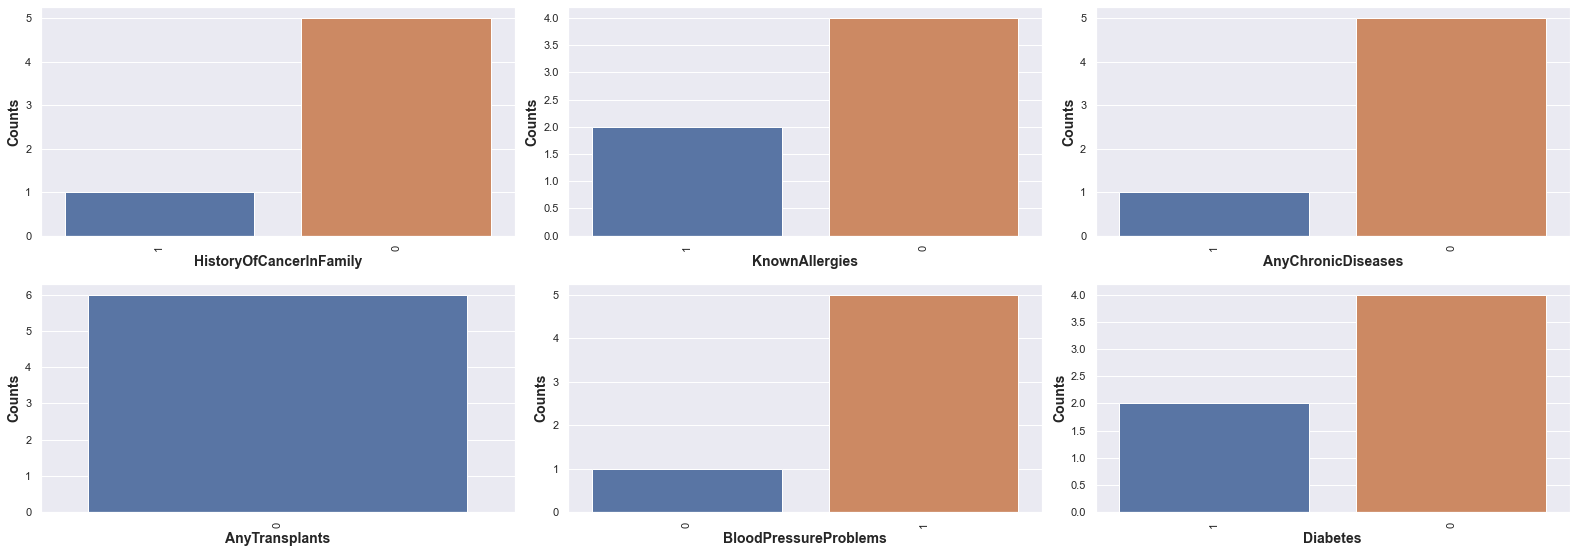

In [12]:
plt.figure(figsize = (22,15))
for y, f in enumerate(binary_cols):
    axc = plt.subplot(4,3,y+1)
    outlier_df = med_EDA[med_EDA['PremiumPrice'] > 38000]
    order2 = outlier_df[f].value_counts().sort_values()
    sns.barplot(x=order2.index, y=order2, ax =axc,order=order2.index)
    plt.xlabel(f, fontweight = 'bold', fontsize = 14)
    plt.ylabel(f'Counts', fontweight = 'bold', fontsize = 14)
    plt.tight_layout()
    plt.xticks(rotation=90)



# Univariate analysis

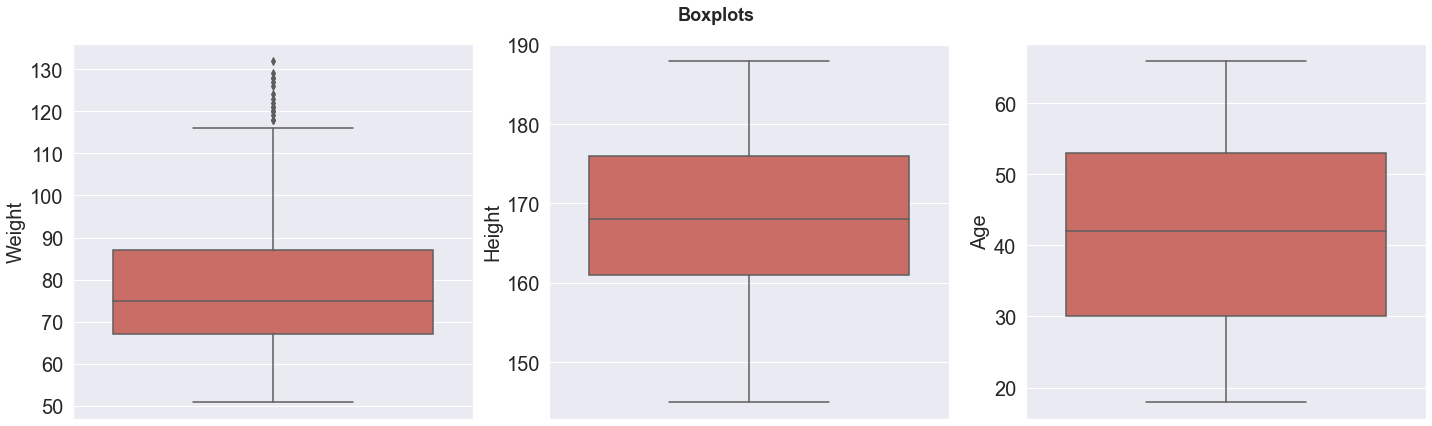

In [13]:
figout, axout = plt.subplots(1, 3, figsize=(20, 6), tight_layout = True)
for i, col in enumerate(numerical_cols):
    axout[i].tick_params(axis='both', which='major', labelsize=20)
    sns.boxplot(data = med_EDA, y=col, ax = axout[i],palette='hls')
    figout.suptitle("Boxplots",fontweight = 'bold', fontsize = 18)
    axout[i].set_ylabel(col,fontsize=20)
figout.show()

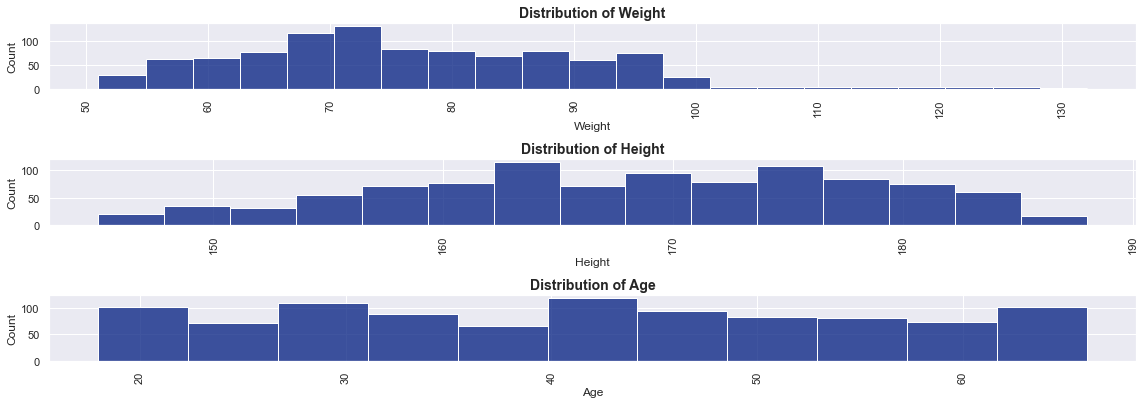

In [14]:
plt.figure(figsize=(16,9))
for o, b in enumerate(numerical_cols):
    sns.set_palette(sns.color_palette("dark"))
    axx = plt.subplot(5,1,o+1)
    sns.histplot(x=b, data = med_EDA, ax = axx)
    sns.set_style('darkgrid')
    plt.xticks(rotation=90)
    axx.set_title(f"Distribution of {b}",fontweight = 'bold', fontsize = 14)
    plt.tight_layout()



- Right skewed distributions

# General features

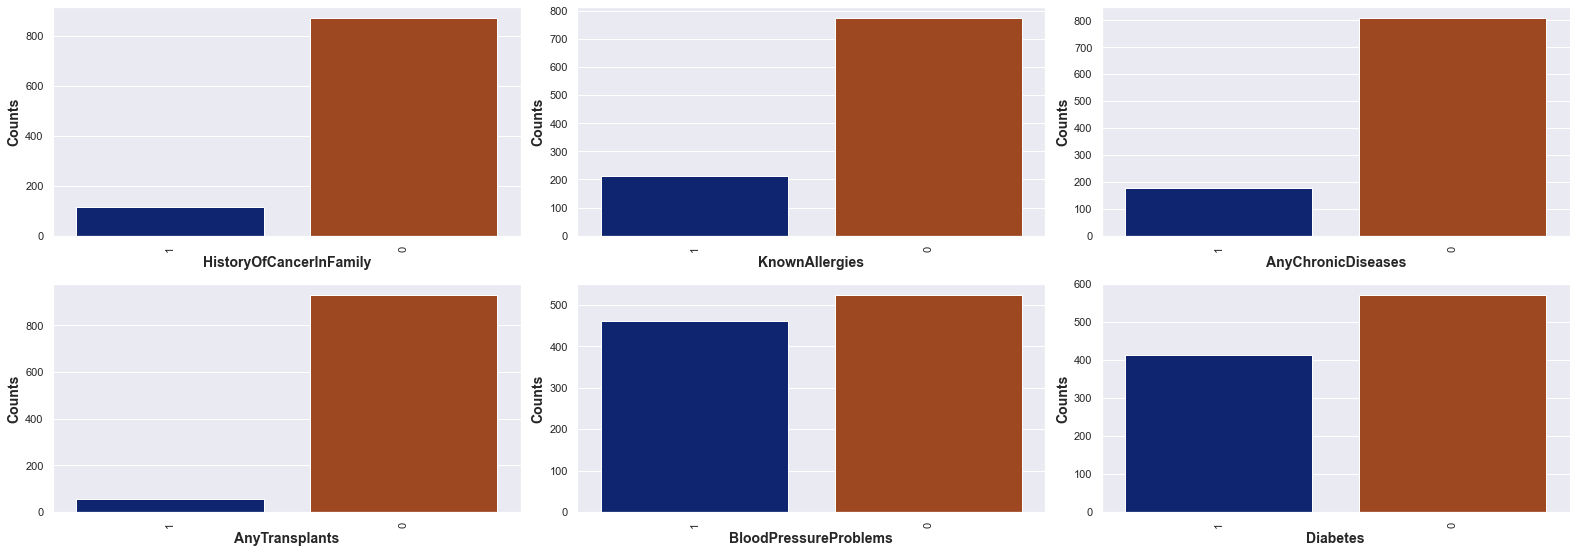

In [15]:
plt.figure(figsize = (22,15))
for y, f in enumerate(binary_cols):
    axc = plt.subplot(4,3,y+1)
    order2 = med_EDA[f].value_counts().sort_values()
    sns.barplot(x=order2.index, y=order2, ax =axc,order=order2.index)
    plt.xlabel(f, fontweight = 'bold', fontsize = 14)
    plt.ylabel(f'Counts', fontweight = 'bold', fontsize = 14)
    plt.tight_layout()
    plt.xticks(rotation=90)



- Most people have do not have any of these symptoms

# Bivariate analysis

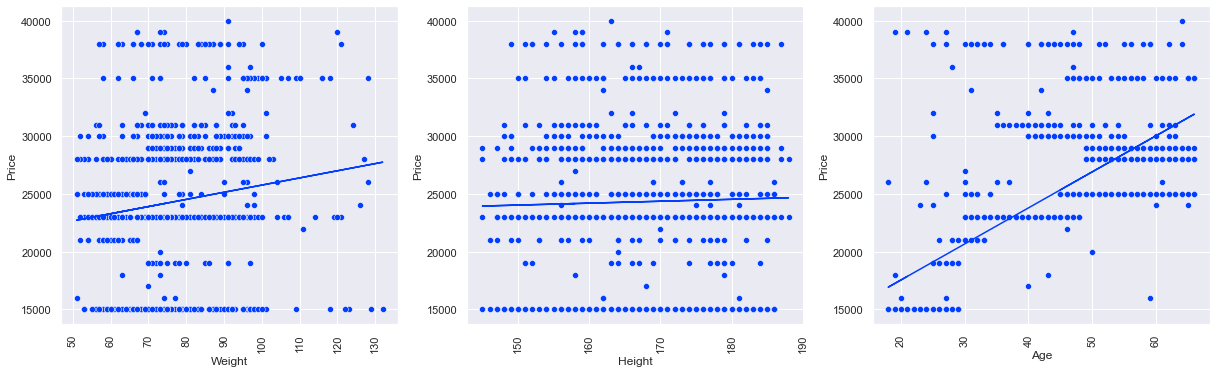

In [16]:
plt.figure(figsize=(17,15))
for i, col in enumerate(numerical_cols):
    sns.set_palette(sns.color_palette("bright"))
    ax = plt.subplot(3,3,i+1)
    m,c = np.polyfit(med_EDA[col],med_EDA['PremiumPrice'],1)
    sns.scatterplot(x=col , y = 'PremiumPrice' , ax = ax , data = med_EDA )
    ax.plot(med_EDA[col] ,med_EDA[col]*m + c  )
    plt.xticks(rotation=90)
    plt.ylabel("Price")
plt.tight_layout()
plt.show()

- No clear presence of bivariate outliers.

# Any Correlation?
- Phik (𝜙k) is a correlation coefficient that works consistently between numerical, ordinal variables. This is very useful for this current dataset.

- The correlation ranges from 0 to 1, with 0 having no association, while 1 denoting high association


In [17]:

# pip install phik
# Please install
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice']


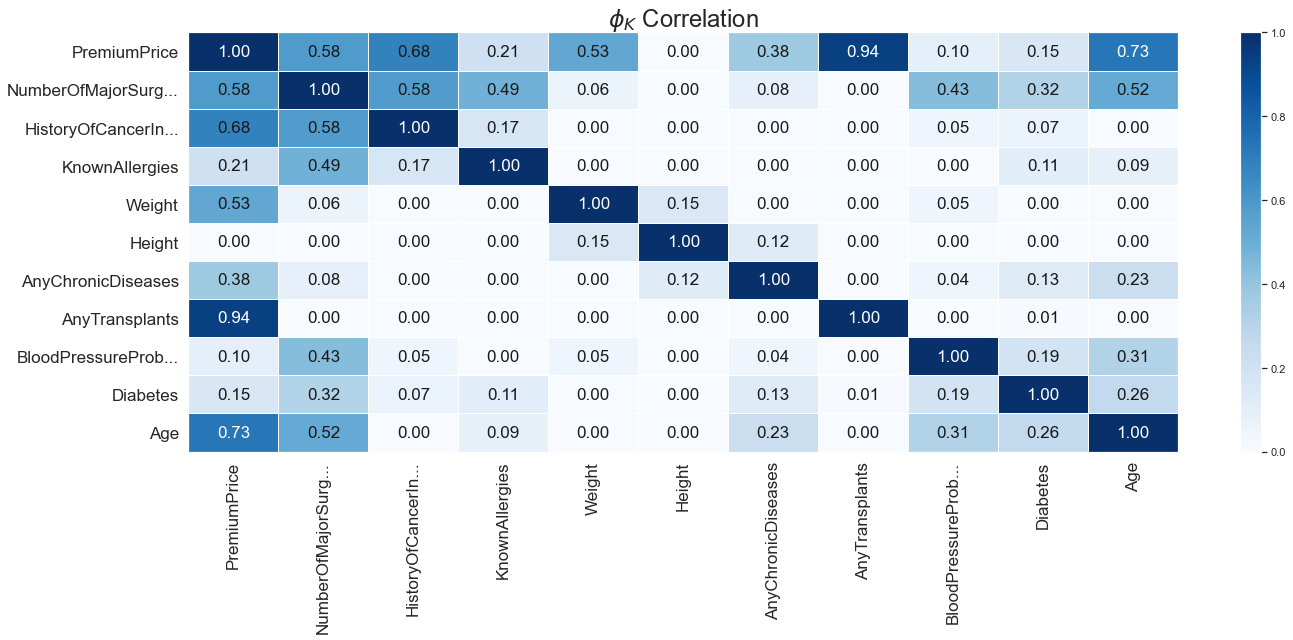

In [18]:
summary = med_EDA.phik_matrix()
plot_correlation_matrix(summary.values, 
                        x_labels=summary.columns, 
                        y_labels=summary.index, 
                        vmin=0, vmax=1, color_map="Blues", 
                        title=r"$\phi_K$ Correlation", 
                        fontsize_factor=1.7, 
                        figsize=(20, 9))
plt.show()

- Presence of correlated features.
- However, due to the fact that we have limited columns, we cannot drop them

# Feature engineering
- BMI - Weight / (height **2) ; (height in meters)
     - Acts as an indicator to tell whether someone is obese, acceptable weight or underweight. This can be an indicator on how healthy the person weight is.
     - Could provide more useful information into the model, to produce more accurate results
     - Insurance organizations do use this information to gauge how healthy one's weight is.

In [4]:
med_df['BMI'] = med_df['Weight'] / ((med_df['Height']/100) ** 2 )

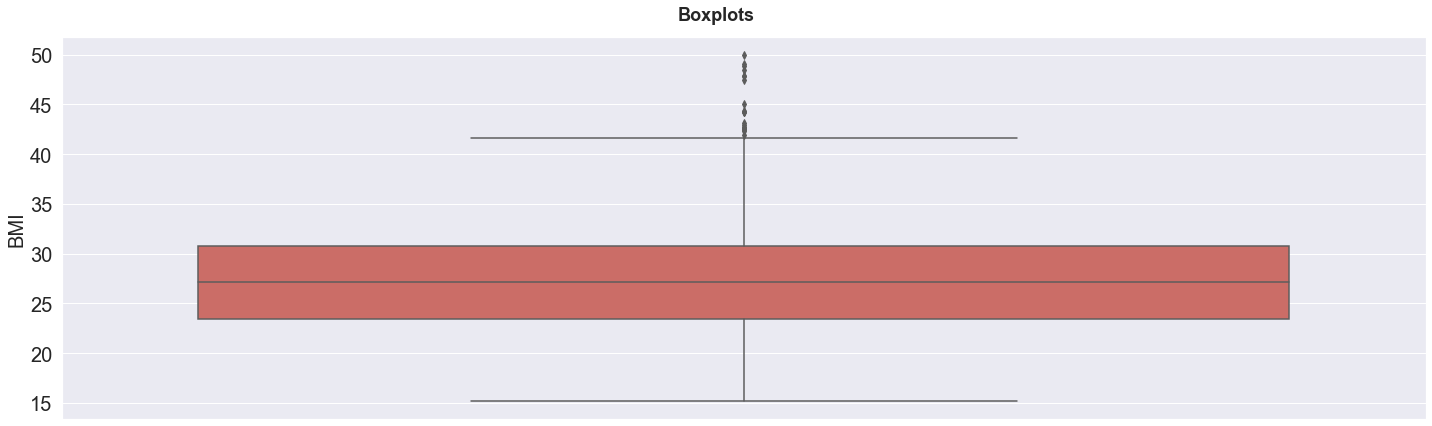

In [5]:
figout, axout = plt.subplots(1,1 , figsize=(20, 6), tight_layout = True)
for i, col in enumerate(['BMI']):
    axout.tick_params(axis='both', which='major', labelsize=20)
    sns.boxplot(data = med_df, y=col, ax = axout,palette='hls')
    figout.suptitle("Boxplots",fontweight = 'bold', fontsize = 18)
    axout.set_ylabel(col,fontsize=20)
figout.show()
# Median is 28, which is considered overweight BMI

# Preprocessing
- Data split

In [19]:
X ,y = med_df.drop(['PremiumPrice'],axis=1), med_df['PremiumPrice']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state =random_state)

# Feature scaling

- Since, numerical variables are of different scales, we will use of StandardScaler() to standardize values.

In [23]:
custom_scaling = ColumnTransformer(
    transformers=[('scaler', StandardScaler(), list(X_train.columns) )],
    remainder='passthrough'
)
preprocess = Pipeline([
    ('Scaling', custom_scaling)
])

- Set up preprocessing pipeline

In [24]:
preprocessing_pipeline = Pipeline([
    ('preprocess', preprocess)
])

# Modelling
- Metrics: Mean squared error & mean absolute percentage error

$$MAE = \frac{\sum^n_{i=1}|y_i-\hat{y}_i|}{n}$$

where $y_i$ is the actual value, and $\hat{y}_i $ is the predicted value, and n is the total number of examples.

- MAE as our primary evaluation metric because it is directly interpretable as the average error of our model, and since it does not square our error, it does not heavily penalize our model when there is extreme outliers, hence it tells how our model performs on typical data

In [25]:
# Function to show cross validation scores for the model purpose is to evaluate model performance
# Cross validate and displays the scores for different metrics on the TRAIN set

def evaluateReg(model,X_train,y_train,name):
    scoring = {
        'r2':'r2',
        'MAPE':'neg_mean_absolute_percentage_error',
        'MAE': 'neg_mean_absolute_error',
    }
    scores = cross_validate(model, X_train, y_train, cv = KFold(n_splits = 5, shuffle = True,random_state=random_state), scoring = 
    scoring, return_train_score = True, return_estimator = True, n_jobs= -1)
    scores = pd.DataFrame(scores).append(pd.DataFrame(scores).describe().loc[['mean','max']]).drop(['fit_time', 'score_time'],axis=1).round(4)
    scores['estimator']= name
    return pd.DataFrame(scores)

    
def model_evaluation(models, X_train, y_train, cv = 5):
    hist = {}
    for idx, model in tqdm(enumerate(models)):
        model_name = re.findall('[^()]+', str(model.named_steps['Model']))[0]
        # print(model_name)
        cv_hist = evaluateReg(model,X_train,y_train,model_name)
        # print(cv_hist)
        ax = plt.subplot(3,3,idx+1)
        # performance in a dict
        hist[model_name] = dict(

            train_mae = cv_hist['train_MAE'].mean(),
            cv_mae = cv_hist['test_MAE'].mean(),
            train_mape = cv_hist['train_MAPE'].mean(),
            cv_mape = cv_hist['test_MAPE'].mean(),
            cv_r2 = cv_hist['test_r2'].mean()
        )
        train_sizes, train_scores, test_scores= learning_curve(
                model,
                X_train,
                y_train,
                cv=KFold(n_splits=cv,shuffle=True),
                n_jobs=-1,
                train_sizes = np.linspace(0.01, 1, 20),
            scoring= 'neg_mean_absolute_error'
        )

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        sns.lineplot(x=train_sizes ,y =train_scores_mean ,ax=ax,label=str('Train Scores') )
        sns.lineplot(x = train_sizes ,y = test_scores_mean,ax=ax,label=str('Test Scores'))
        plt.rc('font', size=14)
        plt.rc('axes', labelsize=14, titlesize=14)
        plt.rc('legend', fontsize=14)
        plt.rc('xtick', labelsize=10)
        plt.rc('ytick', labelsize=10)
        if idx ==0 or idx == 3 or idx ==6:
            plt.ylabel(f"Mean Absolute error")
        plt.xlabel("Train Sizes")
        plt.title(re.findall('[^()]+', str(model.named_steps['Model']))[0])
        
        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                            train_scores_mean + train_scores_std, alpha=0.1,
                            color="r")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                            test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.tight_layout()
        # ax.legend(loc='best')
        # plt.show()
    display(pd.DataFrame(hist))
    return pd.DataFrame(hist)

In [26]:
dummy = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('Model', DummyRegressor(strategy='median'))
])
ridreg = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('Model', Ridge())
])
knr = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('Model', KNeighborsRegressor())
])
dectreereg =  Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('Model', DecisionTreeRegressor(random_state=random_state))
])

lasso = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('Model', Lasso())
])
gbr = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('Model', GradientBoostingRegressor(random_state=random_state))
])
rf = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('Model',  RandomForestRegressor(random_state=random_state))
])

xgb = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('Model', xgboost.XGBRegressor(random_state=random_state)  )
])

8it [00:13,  1.72s/it]


,DummyRegressor,Lasso,Ridge,KNeighborsRegressor,DecisionTreeRegressor,GradientBoostingRegressor,RandomForestRegressor,XGBRegressor
train_mae,-4810.940429,-2679.632829,-2683.394443,-2290.417729,0.000000,-1110.642329,-469.794986,-47.555971
cv_mae,-4798.440457,-2705.737200,-2705.248700,-2906.154500,-1137.707500,-1670.333800,-1258.631929,-1549.727886
train_mape,-0.215371,-0.116214,-0.116457,-0.102157,0.000000,-0.045171,-0.019757,-0.002043
cv_mape,-0.214971,-0.117300,-0.117500,-0.128586,-0.048300,-0.068557,-0.052057,-0.063771
cv_r2,-0.044500,0.618457,0.620586,0.518514,0.590357,0.755414,0.748171,0.716029


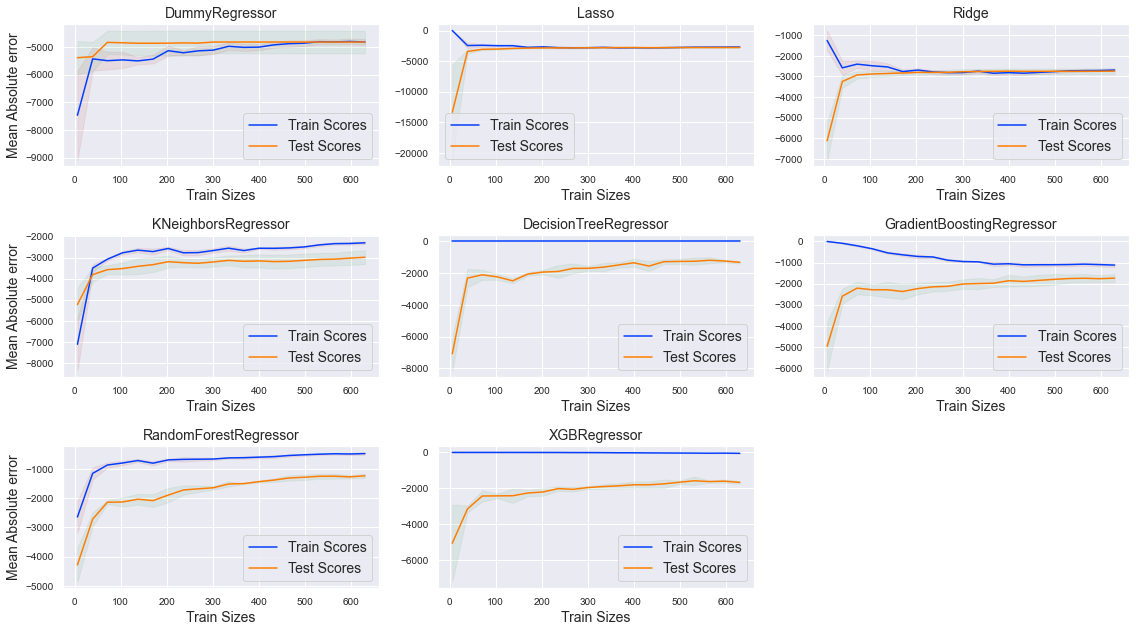

In [56]:
plt.figure(figsize=(16,9))
scores_final = model_evaluation([dummy, lasso,ridreg,knr, dectreereg,gbr,rf, xgb],X_train,y_train)

# Model Evaluation
After training the models and scrutinizing the outcomes, we can note several observations

># 1. Stupid Baseline Model
- The stupid baseline model (dummy regressor) does not do well at all with a horrible mean absolute error. It is also severely underfitting.

># 2. Linear Models
- Lasso and Ridge regression generally do not overfit, and have pretty low variance given the small difference in CV and train MAE scores.
- They do however underfit as they may not be complex enough and generally performs poorly
- These models pale in comparison to ensemble models in terms of MAE

> **Possible Improvement step**
- One possible improvement is to introduce PolynomialFeatures() which generate polynomial and interaction features

> # 3. Distance based models
- KNeighborsRegressor might be suffering from slight underfitting, and has a decent average MAE score
- Slightly overfitting given the larger difference in errors in CV and training sets

> **Possible Improvement step**
- One improvement approach to take could be changing the scalers


># 4. Tree Models
- Severely overfits given the large gap between average train MAE and CV MAE. We observe a difference of close to a thousand MAE.
- Performs better than linear models and distance models in terms of cross validation mean absolute error

> **Possible Improvement step**
- One improvement could be further tuning model by optimizing hyperparameters

># 5. Ensembles
- Gradient Boosting and Random forests perform very well, suffering from slight overfitting.
- RandomForest posses low bias, indicated by low errors from CV sets.
- Gradient boosting generally have pretty high bias, which seems like it is underfitting.

> **Possible Improvement step**
- One improvement approach to take is to tune hyper parameters, such as max_depth or learning_rate for gradient boostings.

> # 6. XGBoost
- XGBoost model severely overfits, with large deviation between average cv mae and train MAE.

# Final Model Evaluation
- Generally, Random Forests performed the best with a lowest mean absolute percentage error, as well as posessing the lowest variance. (Smallest gap between average train and CV MAE)
- Does not overfit severely like XGBoost and decision trees but hits the sweet spot.
- Outperforms all models in terms of cv MAE and mean absoslute percentage error except for decision trees. Decision trees on the other hand ovefits the most, which means decision trees are not able to generalize well. Hence random forests are the best

In [57]:
display(scores_final.T.sort_values('cv_mae', ascending=False))

,train_mae,cv_mae,train_mape,cv_mape,cv_r2
DecisionTreeRegressor,0.000000,-1137.707500,0.000000,-0.048300,0.590357
RandomForestRegressor,-469.794986,-1258.631929,-0.019757,-0.052057,0.748171
XGBRegressor,-47.555971,-1549.727886,-0.002043,-0.063771,0.716029
GradientBoostingRegressor,-1110.642329,-1670.333800,-0.045171,-0.068557,0.755414
Ridge,-2683.394443,-2705.248700,-0.116457,-0.117500,0.620586
Lasso,-2679.632829,-2705.737200,-0.116214,-0.117300,0.618457
KNeighborsRegressor,-2290.417729,-2906.154500,-0.102157,-0.128586,0.518514
DummyRegressor,-4810.940429,-4798.440457,-0.215371,-0.214971,-0.044500


# Model Improvement

- I noticed that random forests are still overfitting, hence I will try and employ some techniques to reduce overfitting

In [97]:
# Utility function: Validation curve function to be plotted
def plot_vc(model, X_train, y_train, param_name, param_range,ax):
  train_scores, test_scores = validation_curve(model, X_train, y_train,cv=KFold(shuffle=True,random_state = random_state,n_splits=3), param_name = param_name, param_range = param_range, scoring='neg_mean_absolute_error', n_jobs = -1)
  sns.lineplot(x=np.tile(param_range, train_scores.shape[1]), y=train_scores.flatten(), ax = ax, label = 'Train Scores')
  sns.lineplot(x=np.tile(param_range, test_scores.shape[1]), y=test_scores.flatten(), ax = ax,label = 'CV Scores')
  ax.set_title(f"V. Curve ({param_name})")
  ax.set_ylabel("MAE")
  ax.set_xlabel(f"{param_name}")

# Validation curve for analysis of hyperparameters
1. We will first plot validation curves to discover the most optimal range of hyperparamaters to tune for the model.
2. We want to see the influence of hyperparameter for the model
2. This is done before performing gridsearchcv

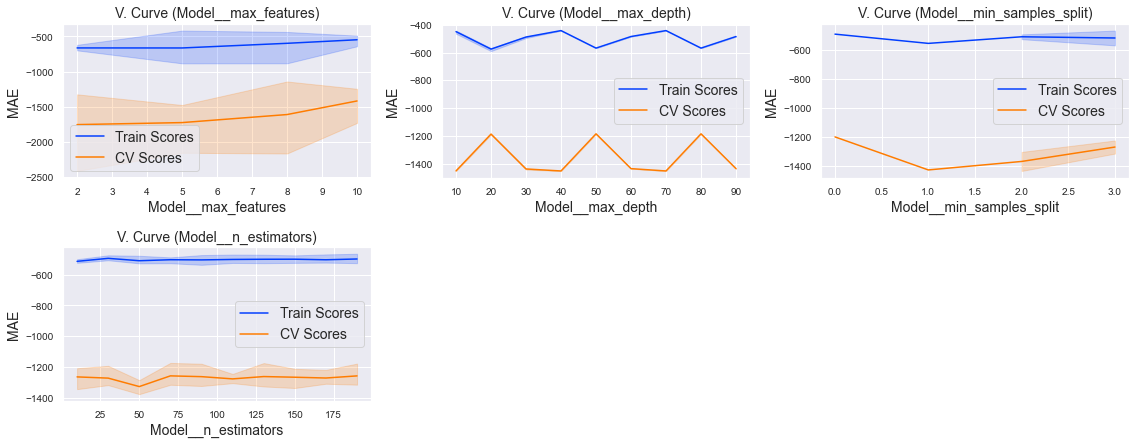

In [98]:
val_dc = clone(rf)
param_copy = {
    "Model__max_features" : [2,5,8,10],
    "Model__max_depth" : [10,20,30,40,50,60,70,80,90],
    "Model__min_samples_split" : np.arange(0,4),
    "Model__n_estimators" : np.arange(10,200,20)
}
plt.figure(figsize=(16,9))

for i,paramname in zip(range(len(param_copy)), param_copy):
    ax = plt.subplot(3,3,i+1)
    plot_vc(val_dc,X_train,y_train, f'{paramname}',param_copy[paramname],ax )
plt.tight_layout()



- We can see that the optimal number of max features is beyond 7, hence, we will tune from 7 to 14
- For max depth, I will try to tune around 50 to 90, in multiples of 10, the reason why I did not want to go beyond this value is to avoid the problem of overfitting
- For min_samples split, I also tuned values beyond 2, as the graph shows an increase of score beyond ths value
- For n_estimators, I will try to tune values after 30, where the score tends to stabilize. Due to my fear of the model overfitting, I did not want to pick such a high value

# Hyperparameter optimization

- After scrutinizing the validation curves, we will now perform hyperparameter tuning

In [149]:
rf = Pipeline([
    ('preprocess', preprocessing_pipeline),
    ('Model',  RandomForestRegressor(random_state=random_state))
])

In [157]:
param_grid = dict( Model__max_depth = np.arange(50, 90, 10),
                    Model__max_features = np.arange(10,14,1) , 
                    Model__min_samples_split = np.arange(2,5,2) , 
                   Model__n_estimators = np.arange(30,100, 10 )
                   )
mae = make_scorer(mean_absolute_error, greater_is_better=False  )

final_model = GridSearchCV( rf , param_grid, scoring =mae , verbose =1  , n_jobs = -1  )
final_model.fit( X_train, y_train)
print(final_model.best_params_)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
{'Model__max_depth': 50, 'Model__max_features': 11, 'Model__min_samples_split': 4, 'Model__n_estimators': 50}


- Our model score has improved by some margin. (from 1260 to 1090)

In [159]:
final_model.best_score_

-1091.395534805248


# Final Model Evaluation
1. We can see that our model performs quite well on the test set, with an MAE of 1100, which is quite cllose to the cross validation mean absolute error, means our model is not overfitting much.
2. Since insurance prices are in the 10 thousands, our MAE is pretty good
3. Paired with an MAPE of 4.4%, our model performs very well

,MAE,MAPE
0,1098.514299,0.043916


Mean Absolute percentage error: 0.04391595407761472


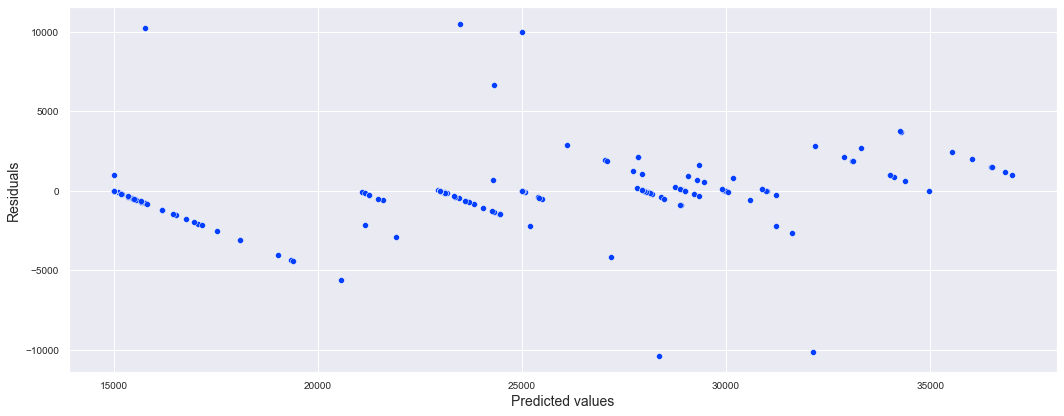

In [163]:
def summaryReport(gridsearch):
    y_pred= gridsearch.predict(X_test) 
    d_final = {'MAE':[], 'MAPE':[]}
    d_final['MAE'].append(mean_absolute_error(y_test, y_pred))
    d_final['MAPE'].append(mean_absolute_percentage_error(y_test,y_pred))
    display(pd.DataFrame(d_final))
    print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test,y_pred))
    
    plt.subplots(figsize=(15, 6), tight_layout=True)
    residuals = y_test-y_pred
    sns.scatterplot(x = y_pred,y =residuals,alpha=1)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.show()

    return y_pred,gridsearch,residuals
y_hat,gsrch,resid = summaryReport(final_model)

# Feature Importance

![](../application/static/images/featureimp.png)

In [ ]:
# Feature importances
fig5, ax5 = plt.subplots(figsize=(16, 7))
idx = list(X_train.columns)
importance = pd.DataFrame(final_model.best_estimator_.named_steps["Model"].feature_importances_,index=idx,columns=['Importance'])
sortidx= pd.DataFrame(importance['Importance'].sort_values(ascending=False)).index
lbl = importance['Importance'].sort_values(ascending=False).round(3)
sns.barplot(data=importance,x='Importance',y = idx,order= sortidx).bar_label(container=ax5.containers[0], labels=lbl)

fig5.suptitle('Feature importance for Model', fontsize=19)
plt.show()
pd.DataFrame(lbl)

# Model saving

In [76]:
import pickle

with open('regressor_final.p', 'wb') as f:
    pickle.dump(file=f, obj=final_model)

In [6]:
!jupyter nbconvert --to html model-training.ipynb

[NbConvertApp] Converting notebook model-training.ipynb to html
[NbConvertApp] Writing 1463117 bytes to model-training.html
